# Amsterdam - The battle of neighbourhoods

___
### _Table of contents:_
#### 1. Introduction
#### 2. Data
#### 3. Methodology
#### 4. Results
#### 5. Discussion
#### 6. Conclusion
___

### 1. Introduction

This project aims to explore and compare a number of neighbourhoods in the city of Amsterdam, Netherlands, in order to determine the most suitable location for opening a new restaurant. To provide some background to this project, I have been approached by a client who is interested in opening a new Italian restaurant in one of the popular areas of Amsterdam, in a neighbourhood with high population density and a high number of inhabitants. Another criterion for the neighbourhood is for the area to be generally popular when it comes to restaurants, however, the neighbourhood will either have no or only a small number of Italian restaurants in that area to provide a business opportunity for my client. In order to solve my client's business problem, I will use a selection of data analysis and, in particular, location data analysis tools, and will use this report to explore the data, discuss the results, and make recommendations to my client based on this analysis. 

### 2. Data
In this report, two main sources of data will be used in order to solve my client's business problem of opening a new restaurant in Amsterdam. The first type of data is location and demographic data of all the different neighbourhoods in Amsterdam obtained from a freely available data collection website (https://claircitydata.cbs.nl/dataset/689ded75-1a80-4259-b033-63913573c13a/resource/d02c5f12-1cfa-4d7c-91d3-41af8e4ed634/download/wijken_buurten.csv). This data will be transfered from the csv file into a pandas dataframe and all the data relevant to this analysis will be extracted, i.e. the names of the neighbourhoods, their respective population densities, number of inhabitants, and geographical coordinates. The resulting neighbourhoods dataset will be compared based on the criteria proposed by my client and a small number of them will be selected for further analysis and exploration. 

Secondly, the Foursquare location data will be used to explore the popular venues in the selected neighbourhoods of Amsterdam to determine the areas where restaurants are generally popular but no Italian restaurants exist at present or only a small number of them can be found in the area.

### 3. Methodology
This section forms the main component of the report where the data will be analysed and explored, and is divided into a number of sub-sections to help the reader navigate this report. Throughout this part, I use a selection of maps, graphs and other visualisation tools to illustrate the data. These tools may not be visible in the report as such since GitHub does not support these, however, I will upload these visuals as separate files into my GitHub repository and some of them will also be included as part of my final PowerPoint presentation. 

Section 3.1 will deal with 'Creating an initial dataframe and pre-processing data', section 3.2 with 'Selecting neighbourhoods based on population density and number of inhabitants', section 3.3 aims to 'Visualise Amsterdam neighbourhoods with a folium map', and section 3.4 will be dedicated to 'Foursquare location data analysis of selected neighbourhoods in Amsterdam'.


#### 3.1 Creating an initial dataframe and pre-processing data

**Download all Python-compatible libraries required for data analysis**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

print('Libraries imported.')

Libraries imported.


**Read csv file into a *pandas* dataframe**

In [2]:
amsterdam_data = pd.read_csv('https://claircitydata.cbs.nl/dataset/689ded75-1a80-4259-b033-63913573c13a/resource/d02c5f12-1cfa-4d7c-91d3-41af8e4ed634/download/wijken_buurten.csv')
amsterdam_data.head(5)

,subject,region_name,regio_type,region_code,ninhabitants,nmen,nwomen,nage_0_to_15,nage_15_to_25,nage_25_to_45,nage_45_to_65,nage_65_older,nunmarried,nmarried,ndivorced,nwidowed,nimmigrant_western,nimmigrant_nonwestern,nimmigrant_marokko,nimmigrant_antiles_aruba,nimmigrant_surinam,nimmigrant_turkey,nimmigrant_other_non_western,nhouseholds,nhh_single_person,nhh_no_children,nhh_with_children,ave_househ_size,populatio_density,area_total,area_land,area_water,urbanisation_grade,address_density,geojson,lon,lat
0,Amsterdam,Amsterdam,Gemeente,GM0363,833624,411608,422016,127224,108370,293154,204741,100135,531112,203974,73962,24576,140901,289823,75065,12227,66119,42622,93790,456462,251828,92709,111925,1.8,5042.0,21949,16533,5416,1.0,6011.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.879568,52.381000
1,Burgwallen-Oude Zijde,Amsterdam,Wijk,WK036300,4280,2340,1935,255,675,2030,980,355,3280,660,290,65,1275,640,25,40,80,40,455,3070,2160,655,265,1.4,12255.0,40,35,6,1.0,7619.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896943,52.372566
2,Kop Zeedijk,Amsterdam,Buurt,BU03630000,1020,570,445,50,140,520,260,60,765,175,70,15,320,145,5,10,20,10,105,740,520,170,55,1.4,16818.0,8,6,2,1.0,6649.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.900280,52.375937
3,Oude Kerk e.o.,Amsterdam,Buurt,BU03630001,670,365,300,30,130,320,145,55,540,70,55,15,205,105,5,10,15,10,70,500,370,95,45,1.3,7615.0,9,9,0,1.0,7361.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.896156,52.373793
4,Burgwallen Oost,Amsterdam,Buurt,BU03630002,1610,880,730,120,250,755,340,155,1230,255,115,25,495,275,10,15,35,10,210,1120,770,260,105,1.4,25867.0,7,6,1,1.0,7544.0,"{""type"": ""FeatureCollection"",""crs"": { ""type"": ...",4.898757,52.372815


**Display size of dataframe**

In [3]:
print(amsterdam_data.shape)

(579, 37)


**Remove first row and all columns that are not relevant to data analysis**

In [4]:
amsterdam_data.drop(columns =['region_name', 'regio_type', 'region_code', 'nmen', 'nwomen', 'nage_0_to_15', 'nage_15_to_25', 'nage_45_to_65', 'nage_65_older', 'nunmarried', 'nmarried', 'ndivorced', 'nwidowed', 'nimmigrant_western', 'nimmigrant_nonwestern', 'nimmigrant_marokko', 'nimmigrant_antiles_aruba', 'nimmigrant_surinam', 'nimmigrant_turkey', 'nimmigrant_other_non_western', 'nhouseholds', 'nhh_single_person', 'nhh_no_children', 'nhh_with_children', 'ave_househ_size', 'area_total', 'area_land', 'area_water', 'urbanisation_grade', 'address_density', 'geojson'],inplace = True)
amsterdam_data.drop([0], inplace=True)

**Show size and head of reduced dataframe**

In [5]:
print(amsterdam_data.shape)
amsterdam_data.head()

(578, 6)


,subject,ninhabitants,nage_25_to_45,populatio_density,lon,lat
1,Burgwallen-Oude Zijde,4280,2030,12255.0,4.896943,52.372566
2,Kop Zeedijk,1020,520,16818.0,4.900280,52.375937
3,Oude Kerk e.o.,670,320,7615.0,4.896156,52.373793
4,Burgwallen Oost,1610,755,25867.0,4.898757,52.372815
5,Nes e.o.,370,195,6939.0,4.893728,52.370861


**Rename columns as appropriate and set 'Neighbourhood' column as index**

In [6]:
amsterdam_data.rename({'subject': 'Neighbourhood', 'ninhabitants': 'Inhabitants', 'nage_25_to_45': '25_to_45yo', 'populatio_density': 'Population_density', 'lon': 'Longitude', 'lat': 'Latitude'}, axis='columns', inplace=True)
amsterdam_data.set_index('Neighbourhood', inplace=True)

**Convert 'Population_density' column values from float to integer (including any missing values NaN)**

In [7]:
amsterdam_data = amsterdam_data.fillna(0).astype({"Population_density": int})
amsterdam_data.head()

,Inhabitants,25_to_45yo,Population_density,Longitude,Latitude
Neighbourhood,,,,,
Burgwallen-Oude Zijde,4280,2030,12255,4.896943,52.372566
Kop Zeedijk,1020,520,16818,4.900280,52.375937
Oude Kerk e.o.,670,320,7615,4.896156,52.373793
Burgwallen Oost,1610,755,25867,4.898757,52.372815
Nes e.o.,370,195,6939,4.893728,52.370861


#### 3.2 Selecting neighbourhoods based on population density and number of inhabitants

**Sort neighbourhoods by population density**

In [8]:
amsterdam_density = amsterdam_data.sort_values(by='Population_density', ascending=False)
amsterdam_density.head(10)

,Inhabitants,25_to_45yo,Population_density,Longitude,Latitude
Neighbourhood,,,,,
Fannius Scholtenbuurt,3680,1785,35460,4.873901,52.383606
Cremerbuurt Oost,2250,1105,33476,4.866061,52.362071
Orteliusbuurt Noord,1405,635,33014,4.848608,52.371241
Hercules Seghersbuurt,2580,1270,32306,4.888628,52.353796
Orteliusbuurt Midden,1910,960,31349,4.850350,52.368307
Da Costabuurt Zuid,2240,1170,30787,4.874270,52.366838
Noordwestkwadrant Indische buurt Zuid,4480,2115,30770,4.935611,52.362491
Lootsbuurt,1940,930,30612,4.860799,52.363276
Frederik Hendrikbuurt Zuidoost,3340,1680,29530,4.873067,52.374399


**We can see the highest number for population density in this dataset is around 35,000 but the corresponding number of inhabitants does not seem very high so let's explore that separately to see the maximum values for this variable.**

**Sort dataframe by number of inhabitants**

In [9]:
amsterdam_inhabitants = amsterdam_data.sort_values(by='Inhabitants', ascending=False)
amsterdam_inhabitants.head(10)

,Inhabitants,25_to_45yo,Population_density,Longitude,Latitude
Neighbourhood,,,,,
"Bijlmer Oost (E,G,K)",27190,7725,7343,4.977314,52.320278
"Bijlmer Centrum (D,F,H)",23910,7425,7898,4.953987,52.315127
Jordaan,19390,7195,23232,4.880786,52.374805
Landlust,19050,8280,18647,4.854571,52.380731
Oostelijk Havengebied,18475,5750,11966,4.939367,52.375589
Holendrecht/Reigersbos,18280,4755,7043,4.970859,52.296804
Slotermeer-Zuidwest,17260,5515,7679,4.818228,52.373197
Osdorp-Oost,15910,4570,10096,4.807226,52.358039
Osdorp-Midden,15855,5455,15362,4.795133,52.356020


**This gives a better picture of the maximum values for both variables. We will now filter the whole dataframe and only select neighbourhoods that meet the following two conditions: its population density needs to be equal to or greater than 20,000 and number of inhabitants equal to or greater than 10,000.**

**Create a new dataframe from neighbourhoods that meet the required criteria**

In [10]:
amsterdam_battle = amsterdam_data.loc[(amsterdam_data['Population_density'] >=20000.0) & (amsterdam_data['Inhabitants'] >=10000.0)]
print(amsterdam_battle.shape)
amsterdam_battle

(6, 5)


,Inhabitants,25_to_45yo,Population_density,Longitude,Latitude
Neighbourhood,,,,,
Jordaan,19390,7195,23232,4.880786,52.374805
Staatsliedenbuurt,13180,5825,27849,4.874067,52.382340
Oude Pijp,14850,7085,23402,4.894646,52.356054
Nieuwe Pijp,12400,5780,24140,4.896020,52.351907
Indische Buurt West,12560,5495,26806,4.936055,52.362562
Hoofdweg e.o.,10460,4780,26206,4.853510,52.367109


**The resulting dataset are six neighbourhoods of Amsterdam: Jordaan, Staatsliedenbuurt, Oude Pijp, Nieuwe Pijp, Indische Buurt West, and Hoofdweg e.o.**

**Let's explore these neighbourhoods to see how they compare in terms of population density and number of inhabitants, and visualise the differences in a bar chart.**

**Download matplot library**

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

**Remove 'Longitude' and 'Latitude' columns and rename columns for the chart legend**

In [12]:
new_df = amsterdam_battle.drop(columns =['Longitude', 'Latitude'])
new_df

,Inhabitants,25_to_45yo,Population_density
Neighbourhood,,,
Jordaan,19390,7195,23232
Staatsliedenbuurt,13180,5825,27849
Oude Pijp,14850,7085,23402
Nieuwe Pijp,12400,5780,24140
Indische Buurt West,12560,5495,26806
Hoofdweg e.o.,10460,4780,26206


In [13]:
new_df.rename({'25_to_45yo': 'Age group 25-40yo', 'Population_density': 'Population density'}, axis='columns', inplace=True)
new_df

,Inhabitants,Age group 25-40yo,Population density
Neighbourhood,,,
Jordaan,19390,7195,23232
Staatsliedenbuurt,13180,5825,27849
Oude Pijp,14850,7085,23402
Nieuwe Pijp,12400,5780,24140
Indische Buurt West,12560,5495,26806
Hoofdweg e.o.,10460,4780,26206


**Create a series of bar charts to compare the neighbourhoods' population density and number of inhabitants**

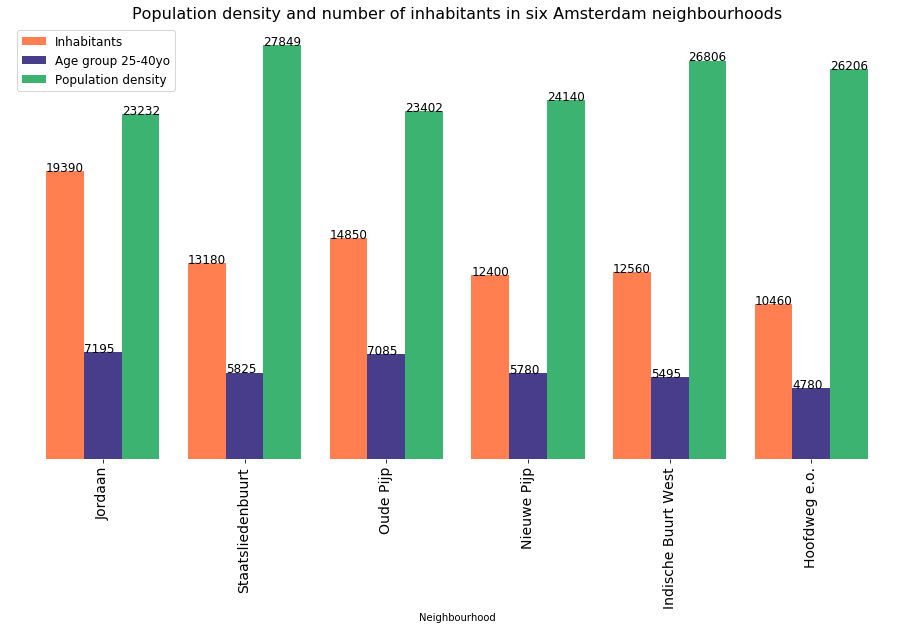

In [14]:
ax=new_df.plot(kind='bar', figsize=(16,8), width=0.8, color=['coral', 'darkslateblue', 'mediumseagreen'], edgecolor=None)

plt.legend(labels=new_df.columns, fontsize=12)
plt.title("Population density and number of inhabitants in six Amsterdam neighbourhoods", fontsize=16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{}'.format(height), (p.get_x()+.0*width, p.get_y() + height+.0), fontsize=12)

#save plot as jpeg image
plt.savefig('amsterdam_plot.jpeg', bbox_inches='tight')

**As we can see from the chart above, the six neighbourhoods are comparable in terms of population density, total number of inhabitants, and number of inhabitants who are between 25 and 45 years old. While Indische Buurt West has the highest population density, Jordaan leads the chart with regards to the total number of inhabitants.**

#### 3.3 Visualise Amsterdam neighbourhoods with a folium map

**Determine geographical coordinates of Amsterdam**

In [15]:
address = 'Amsterdam'

geolocator = Nominatim(user_agent="ams_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Amsterdam are 52.3745403, 4.89797550561798.


**Create a folium map of Amsterdam with neighbourhoods superimposed**

In [16]:
#reset index
amsterdam_data.reset_index(inplace=True)

# create a map of Amsterdam using latitude and longitude values
map_amsterdam = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(amsterdam_data['Latitude'], amsterdam_data['Longitude'], amsterdam_data['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#86cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam

**Save created map as html**

In [17]:
#save map as html
map_amsterdam.save(outfile= "amsterdam_map.html")

**Let's explore the geo coordinates of the selected six neighbourhoods before we picture these on a map**

In [18]:
address = 'Jordaan, Amsterdam'

geolocator = Nominatim(user_agent="jor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Jordaan, Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Jordaan, Amsterdam are 52.3745, 4.87949095066938.


In [19]:
address = 'Staatsliedenbuurt, Amsterdam'

geolocator = Nominatim(user_agent="sta_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Staatsliedenbuurt, Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Staatsliedenbuurt, Amsterdam are 52.3802865, 4.87095069419675.


In [20]:
address = 'Nieuwe Pijp, Amsterdam'

geolocator = Nominatim(user_agent="nie_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Nieuwe Pijp, Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Nieuwe Pijp, Amsterdam are 52.3519527, 4.89307820806475.


In [21]:
address = 'Oude Pijp, Amsterdam'

geolocator = Nominatim(user_agent="oud_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Oude Pijp, Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Oude Pijp, Amsterdam are 52.35521635, 4.894573658548.


In [22]:
address = 'Indische Buurt West, Amsterdam'

geolocator = Nominatim(user_agent="oud_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Indische Buurt West, Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Indische Buurt West, Amsterdam are 52.36199475, 4.93896940967175.


In [23]:
address = 'Hoofdweg e.o., Amsterdam'

geolocator = Nominatim(user_agent="oud_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Hoofdweg e.o., Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Hoofdweg e.o., Amsterdam are 52.3662892, 4.85383765855202.


**Create a new dataframe to include geo coordinates and reset index**

In [24]:
amsterdam_hoods = amsterdam_data.loc[(amsterdam_data['Population_density'] >=20000.0) & (amsterdam_data['Inhabitants'] >=10000.0)]
amsterdam_hoods.reset_index(inplace=True)
amsterdam_hoods

,index,Neighbourhood,Inhabitants,25_to_45yo,Population_density,Longitude,Latitude
0,45,Jordaan,19390,7195,23232,4.880786,52.374805
1,109,Staatsliedenbuurt,13180,5825,27849,4.874067,52.382340
2,150,Oude Pijp,14850,7085,23402,4.894646,52.356054
3,156,Nieuwe Pijp,12400,5780,24140,4.896020,52.351907
4,181,Indische Buurt West,12560,5495,26806,4.936055,52.362562
5,242,Hoofdweg e.o.,10460,4780,26206,4.853510,52.367109


**Create a folium map to display the neighbourhoods and their proximity**

In [25]:
# create map using latitude and longitude values
map_battle = folium.Map(location=[latitude, longitude], zoom_start=13)

# add circles to map to mark both neighbourhoods
for lat, lng, label in zip(amsterdam_hoods['Latitude'], amsterdam_hoods['Longitude'], amsterdam_hoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=250,
        popup=label,
        color='purple',
        fill=True,
        fill_color='None',
        fill_opacity=0.7,
        parse_html=False).add_to(map_battle)  
    
map_battle

In [26]:
#save map as html
map_battle.save(outfile= "amsterdambattle_map.html")

#### 3.4 Foursquare location data analysis of selected neighbourhoods in Amsterdam

**Define Foursquare credentials and version**

In [27]:
CLIENT_ID = 'F13HMB5L3JKK3YI4I2ID4SU2YC4FWSV4NNT1O5RLM4VDHKGJ'
CLIENT_SECRET = 'BUL0XZLUH2TJLF2VIIDYV4LWNFXJ14YW5P32JSCP4RGLA1LA'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F13HMB5L3JKK3YI4I2ID4SU2YC4FWSV4NNT1O5RLM4VDHKGJ
CLIENT_SECRET:BUL0XZLUH2TJLF2VIIDYV4LWNFXJ14YW5P32JSCP4RGLA1LA


**Create url to get top 50 venues in Jordaan within a radius of 500 metres**

In [28]:
#Jordaan
neighborhood_latitude = 52.3745
neighborhood_longitude = 4.87949095066938
LIMIT = 50
radius = 500

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=F13HMB5L3JKK3YI4I2ID4SU2YC4FWSV4NNT1O5RLM4VDHKGJ&client_secret=BUL0XZLUH2TJLF2VIIDYV4LWNFXJ14YW5P32JSCP4RGLA1LA&v=20180605&ll=52.3745,4.87949095066938&radius=500&limit=50'

**Create GET request and display results**

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c4e1c56db04f57ab1c39e55'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jordaan',
  'headerFullLocation': 'Jordaan, Amsterdam',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 116,
  'suggestedBounds': {'ne': {'lat': 52.3790000045, 'lng': 4.88684823037152},
   'sw': {'lat': 52.369999995499995, 'lng': 4.872133670967241}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54819cb3498e6ba0cc56c0e0',
       'name': 'Kessens',
       'location': {'address': 'Rozengracht 24',
        'lat': 52.373800316876,
        'lng': 4.881990847017862,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.373800316876,
          '

**Create a function to extract venue categories from *Foursquare***

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Clean json data and create a new pandas dataframe for nearby venues**

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Kessens,Café,52.373800,4.881991
1,Café Chris,Bar,52.374224,4.881570
2,Salmuera,Latin American Restaurant,52.373261,4.879472
3,Van Ness Cupcake,Cupcake Shop,52.373582,4.881824
4,Mr. Jordaan Hotel,Hostel,52.374667,4.880094
5,De Nieuwe Lelie,Bar,52.375294,4.880843
6,Health Club Jordaan,Gym / Fitness Center,52.372969,4.880215
7,Boom Chicago,Comedy Club,52.372953,4.878903
8,Mantoe,Afghan Restaurant,52.375454,4.880783
9,Struik,Café,52.372868,4.878398


In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


**Create a function to repeat the same process for all neighourhoods and change the limit to increase the resulting dataset**

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)    
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Execute the function on our dataframe**

In [34]:
amsterdamhoods_venues = getNearbyVenues(names=amsterdam_hoods['Neighbourhood'],
                                   latitudes=amsterdam_hoods['Latitude'],
                                   longitudes=amsterdam_hoods['Longitude']
                                  )

Jordaan
Staatsliedenbuurt
Oude Pijp
Nieuwe Pijp
Indische Buurt West
Hoofdweg e.o.


In [35]:
print(amsterdamhoods_venues.shape)
amsterdamhoods_venues.tail()

(452, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
447,Hoofdweg e.o.,52.367109,4.85351,Nightshop Neighbours At 102,52.364254,4.853414,Convenience Store
448,Hoofdweg e.o.,52.367109,4.85351,Mediq Apotheek,52.364092,4.853826,Pharmacy
449,Hoofdweg e.o.,52.367109,4.85351,Bushalte Postjesweg,52.363931,4.853178,Bus Stop
450,Hoofdweg e.o.,52.367109,4.85351,Energy Dictator,52.370945,4.857020,Liquor Store
451,Hoofdweg e.o.,52.367109,4.85351,Piri Reïsplein,52.365759,4.860463,Plaza


In [36]:
print('There are {} uniques categories.'.format(len(amsterdamhoods_venues['Venue Category'].unique())))

There are 136 uniques categories.


**Apply one hot encoding and create a new dataframe with venue categories**

In [37]:
# one hot encoding
amsterdamhoods_onehot = pd.get_dummies(amsterdamhoods_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
amsterdamhoods_onehot['Neighborhood'] = amsterdamhoods_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [amsterdamhoods_onehot.columns[-1]] + list(amsterdamhoods_onehot.columns[:-1])
amsterdamhoods_onehot = amsterdamhoods_onehot[fixed_columns]

amsterdamhoods_onehot.head(10)

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Eastern European Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Liquor Store,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Museum,Music Venue,Office,Optical Shop,Organic Grocery,Park,Pastry Shop,Pet Café,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Rental Service,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Snack Place,South American Restaurant,Spa,Spanish Restaurant,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Jordaan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [38]:
#display size of the new dataframe
amsterdamhoods_onehot.shape

(452, 137)

**Group venue categories together and display mean frequencies for each neighbourhood**

In [39]:
amsterdamhoods_grouped = amsterdamhoods_onehot.groupby('Neighborhood').mean().reset_index()
amsterdamhoods_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Eastern European Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Latin American Restaurant,Liquor Store,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Museum,Music Venue,Office,Optical Shop,Organic Grocery,Park,Pastry Shop,Pet Café,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Rental Service,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Snack Place,South American Restaurant,Spa,Spanish Restaurant,Stables,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Hoofdweg e.o.,0.00,0.00,0.00,0.018868,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.075472,0.037736,0.000000,0.018868,0.000000,0.037736,0.000000,0.00,0.000000,0.000000,0.000000,0.018868,0.018868,0.00,0.000000,0.00,0.000000,0.00,0.018868,0.075472,0.00,0.018868,0.000000,0.018868,0.00,0.00,0.037736,0.000000,0.018868,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.018868,0.000000,0.00,0.000000,0.018868,0.00,0.00,0.000000,0.018868,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.018868,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.037736,0.018868,0.000000,0.00,0.000000,0.00,0.00,0.00,0.018868,0.00,0.000000,0.018868,0.00,0.000000,0.000000,0.00,0.00,0.018868,0.00,0.00,0.00,0.000000,0.00,0.018868,0.018868,0.037736,0.000000,0.00,0.037736,0.00,0.018868,0.00,0.00,0.00,0.094340,0.00,0.00,0.00,0.00,0.018868,0.000000,0.018868,0.00,0.00,0.00,0.037736,0.00,0.000000,0.018868,0.000000,0.00,0.00,0.00,0.056604,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.018868
1,Indische Buurt West,0.00,0.00,0.00,0.000000,0.00,0.00,0.054545,0.018182,0.018182,0.000000,0.00,0.054545,0.054545,0.018182,0.000000,0.000000,0.018182,0.018182,0.018182,0.00,0.000000,0.000000,0.018182,0.000000,0.018182,0.00,0.000000,0.00,0.000000,0.00,0.018182,0.072727,0.00,0.018182,0.018182,0.000000,0.00,0.00,0.000000,0.018182,0.000000,0.00,0.00,0.018182,0.000000,0.00,0.00,0.00,0.000000,0.018182,0.000000,0.00,0.018182,0.000000,0.00,0.00,0.018182,0.018182,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.018182,0.000000,0.018182,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.018182,0.000000,0.018182,0.00,0.036364,0.00,0.00,0.00,0.000000,0.00,0.036364,0.000000,0.00,0.018182,0.036364,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.036364,0.00,0.018182,0.00,0.000000,0.00,0.00,0.00,0.054545,0.00,0.00,0.00,0.00,0.018182,0.000000,0.018182,0.00,0.00,0.00,0.036364,0.00,0.018182,0.000000,0.018182,0.00,0.00,0.00,0.000000,0.018182,0.018182,0.00,0.000000,0.00,0.00,0.000000
2,Jordaan,0.00,0.01,0.00,0.020000,0.01,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.110000,0.000000,0.000000,0.000000,0.0

In [40]:
amsterdamhoods_grouped.shape

(6, 137)

**Show only frequency values for Italian restaurant category**

In [41]:
print(amsterdamhoods_grouped['Italian Restaurant'], amsterdamhoods_grouped['Neighborhood'])

0    0.000000
1    0.036364
2    0.020000
3    0.040000
4    0.020000
5    0.090909
Name: Italian Restaurant, dtype: float64 0          Hoofdweg e.o.
1    Indische Buurt West
2                Jordaan
3            Nieuwe Pijp
4              Oude Pijp
5      Staatsliedenbuurt
Name: Neighborhood, dtype: object


**As we can see, all neighbourhoods except for one have at least two Italian restaurants in the area (with mean frequencies between 0.02 and 0.09). The only neighbourhood in the dataset that has no Italian restaurant within 500 metre radius is Hoofdweg e.o.**

**Display top 10 venue categories for each neighbourhood**

In [42]:
num_top_venues = 10

for hood in amsterdamhoods_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = amsterdamhoods_grouped[amsterdamhoods_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Hoofdweg e.o.----
             venue  freq
0       Restaurant  0.09
1      Coffee Shop  0.08
2              Bar  0.08
3     Tram Station  0.06
4    Deli / Bodega  0.04
5      Supermarket  0.04
6           Bistro  0.04
7            Plaza  0.04
8      Pizza Place  0.04
9  Bed & Breakfast  0.04


----Indische Buurt West----
                        venue  freq
0                 Coffee Shop  0.07
1                      Bakery  0.05
2                  Restaurant  0.05
3            Asian Restaurant  0.05
4                         Bar  0.05
5                 Supermarket  0.04
6  Modern European Restaurant  0.04
7                      Market  0.04
8                    Platform  0.04
9          Italian Restaurant  0.04


----Jordaan----
                    venue  freq
0                     Bar  0.11
1                   Hotel  0.05
2                    Café  0.05
3    Marijuana Dispensary  0.03
4              Restaurant  0.03
5  Furniture / Home Store  0.03
6             Pizza Place  0.03
7  

**Create a new functiton for most common venues**

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Create a new dataframe with top 10 popular venue categories for each neighbourhood**

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = amsterdamhoods_grouped['Neighborhood']

for ind in np.arange(amsterdamhoods_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(amsterdamhoods_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hoofdweg e.o.,Restaurant,Coffee Shop,Bar,Tram Station,Plaza,Ice Cream Shop,Bistro,Pizza Place,Deli / Bodega,Bed & Breakfast
1,Indische Buurt West,Coffee Shop,Restaurant,Asian Restaurant,Bar,Bakery,Platform,Italian Restaurant,Market,Modern European Restaurant,Supermarket
2,Jordaan,Bar,Café,Hotel,Yoga Studio,Pizza Place,Restaurant,Sandwich Place,Marijuana Dispensary,Thai Restaurant,Furniture / Home Store
3,Nieuwe Pijp,Pizza Place,Café,Restaurant,Italian Restaurant,Breakfast Spot,Bar,Dessert Shop,Japanese Restaurant,Ice Cream Shop,Salad Place
4,Oude Pijp,Café,Bar,French Restaurant,Pizza Place,Indonesian Restaurant,Coffee Shop,Seafood Restaurant,Deli / Bodega,Vegetarian / Vegan Restaurant,Japanese Restaurant
5,Staatsliedenbuurt,Italian Restaurant,Coffee Shop,Bar,Indie Movie Theater,Café,Restaurant,Snack Place,Bistro,Hotel Bar,Breakfast Spot


**As we can see from the above, Hoofdweg e.o. neighbourhood is popular with restaurants (1st most common venue) as well as pizza places (8th most common).**

### 4. Results
In the previous section, a thorough data analysis has  been conducted using various data analysis tools. Firstly, the location and demographic data of all the different neighbourhoods in Amsterdam have been explored and analysed. Our client's criteria for the chosen neighbourhood were high population density and a high number of inhabitants compared to other areas so the neighbourhoods have been filtered based on these conditions and the following six best met the criteria: Jordaan, Staatsliedenbuurt, Oude Pijp, Nieuwe Pijp, Indische Buurt West, and Hoofdweg e.o. The demographic values of these six areas were compared and contrasted using a series of bar charts, and their proximity visualised via a folium map.

Secondly, these six neighbourhoods have been analysed using the Foursquare location data app for developers. For each area the top 100 venues within 500 metre radius have been extracted. The data has been grouped by venue categories and the mean frequencies for these categories have been generated for each neighbourhood. The Italian Restaurant category was examined more closely and the mean frequency values were as follows:


| Neighbourhood      | Italian Restaurant |
| -------------------|:------------------:|
| Hoofdweg e.o.      | 0.00               |
| Indische Buurt West| 0.04               |
| Jordaan            | 0.02               |
| Nieuwe Pijp        | 0.04               |
| Oude Pijp          | 0.02               |
| Staatsliedenbuurt  | 0.09               |


As we can see from the above table, all neighbourhoods examined except for one have at least two Italian restaurants in the area (with mean frequencies between 0.02 and 0.09). The only neighbourhood in the dataset that has no Italian restaurant within the radius of 500 metres is Hoofdweg e.o. Other observations can also be made about this neighbourhood. The analysis also shows that the area is generally popular with restaurants (1st most common venue type, mean frequency = 0.09) as well as pizza places (8th most common venue, mean frequency = 0.04).

### 5. Discussion

In this section, recommendations will be made to the client based on the analysis results presented above. As mentioned earlier, the business problem to be solved using this reports was to open a new Italian restaurant in one of the popular neighbourhoods of Amsterdam. The client's requirements for the selected neighbourhood were as follows:

* high population density
* high number of inhabitants relative to other areas
* area generally popular with restaurants
* no or only a small number of Italian restaurants are present in the neighbourhood

Having examined the dataset very thoroughly, we can conclude there is only one neighbourhood in Amsterdam that fulfills all of the client's requirements - Hoofdweg e.o. (with population density of 26,206, 10,460 inhabitants, no Italian restaurant in the area at the moment but restaurants generally popular). All things considered, we recommend to the client that the best business opportunity for them would be to open a new Italian restaurant in the neighbourhood called Hoofdweg e.o.


### 6. Conclusion

To conclude, this project and report aimed to explore and compare a number of neighbourhoods in the city of Amsterdam, Netherlands, in order to determine the most suitable location for opening a new restaurant. The client's business idea was to open a new Italian restaurant in a popular area of Amsterdam with high population density and a high number of inhabitants. The client's preference was also for the area to be generally popular when it comes to restaurants, however, the neighbourhood would either have no or only a small number of Italian restaurants at present. Having used a number of data analysis methods and tools and considering the client's criteria, we have discovered that the neighbourhood called Hoofdweg e.o. presents the most interesting business opportunity for the client and have recommended for them to open a new Italian restaurant in this area.

#### Link to presentation: 

https://github.com/lucievr/Coursera_Capstone/blob/master/Amsterdam%20final%20presentation.pdf

#### Thank you for your attention!